<a href="https://www.kaggle.com/code/souravchanda01/stock-price-forecast?scriptVersionId=127539701" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Import Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error,r2_score
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import warnings
warnings.filterwarnings('ignore')

/kaggle/input/stock-price-forecast/ISCTR.IS (1).csv


# Load Data

In [2]:
df = pd.read_csv('/kaggle/input/stock-price-forecast/ISCTR.IS (1).csv')

In [3]:
viz = df.copy()

In [4]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-02-17,2.970060,2.997060,2.902558,2.902558,2.349932,55057948.0
1,2015-02-18,2.920559,2.979060,2.916059,2.956560,2.393652,31801480.0
2,2015-02-19,3.006061,3.006061,2.965560,2.992560,2.422798,37002206.0
3,2015-02-20,2.988060,2.988060,2.929559,2.938559,2.379078,30158007.0
4,2015-02-23,2.866558,2.889058,2.857558,2.875558,2.328072,83954148.0
5,2015-02-24,2.898058,2.916059,2.875558,2.911559,2.357219,79967589.0
6,2015-02-25,2.992560,2.997060,2.934059,2.943059,2.382722,37755186.0
7,2015-02-26,2.974560,2.983560,2.916059,2.916059,2.360862,43176303.0
8,2015-02-27,2.826057,2.862058,2.808057,2.830557,2.291639,79117913.0
9,2015-03-02,2.853057,2.862058,2.830557,2.853057,2.309855,33613775.0


# Data Cleaning & Visualization

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2057 entries, 0 to 2056
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2057 non-null   object 
 1   Open       2056 non-null   float64
 2   High       2056 non-null   float64
 3   Low        2056 non-null   float64
 4   Close      2056 non-null   float64
 5   Adj Close  2056 non-null   float64
 6   Volume     2056 non-null   float64
dtypes: float64(6), object(1)
memory usage: 112.6+ KB


In [6]:
df.isnull().sum()

Date         0
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

In [7]:
df=df.dropna(how='any', subset=['Open','High','Low','Close','Adj Close','Volume'])
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-02-17,2.970060,2.997060,2.902558,2.902558,2.349932,55057948.0
1,2015-02-18,2.920559,2.979060,2.916059,2.956560,2.393652,31801480.0
2,2015-02-19,3.006061,3.006061,2.965560,2.992560,2.422798,37002206.0
3,2015-02-20,2.988060,2.988060,2.929559,2.938559,2.379078,30158007.0
4,2015-02-23,2.866558,2.889058,2.857558,2.875558,2.328072,83954148.0
5,2015-02-24,2.898058,2.916059,2.875558,2.911559,2.357219,79967589.0
6,2015-02-25,2.992560,2.997060,2.934059,2.943059,2.382722,37755186.0
7,2015-02-26,2.974560,2.983560,2.916059,2.916059,2.360862,43176303.0
8,2015-02-27,2.826057,2.862058,2.808057,2.830557,2.291639,79117913.0
9,2015-03-02,2.853057,2.862058,2.830557,2.853057,2.309855,33613775.0


In [8]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [9]:
df.shape

(2056, 7)

<AxesSubplot:>

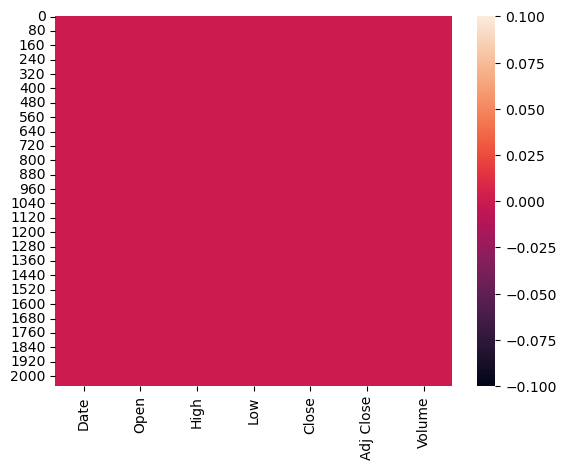

In [10]:
sns.heatmap(df.isnull())

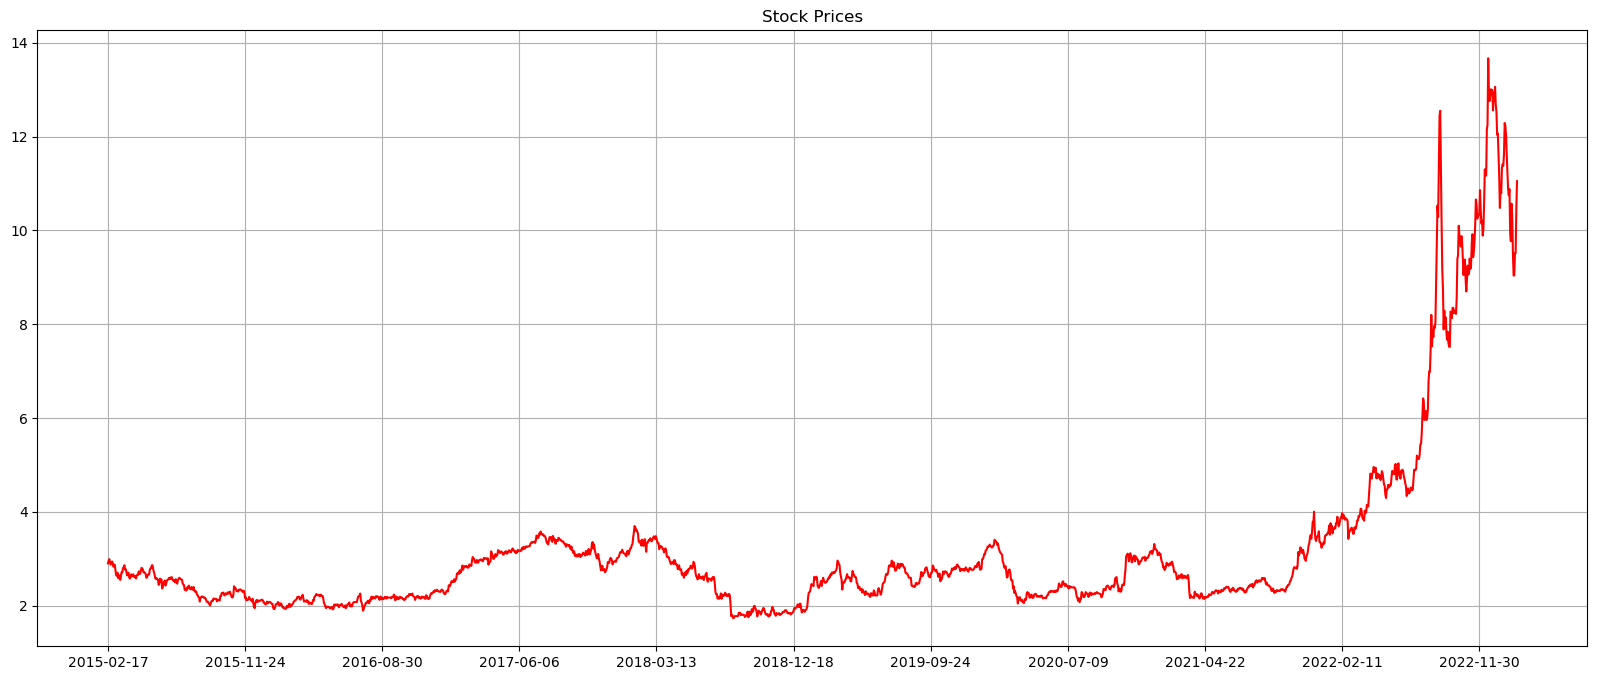

In [11]:
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(df['Date'], df['Close'], color='Red')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
plt.title('Stock Prices')
plt.grid()
plt.show()

In [12]:
def volume_analysis(df,cmp):
    plt.figure(figsize=(10,5))
    plt.plot(df['Date'],df['Volume'],c='blue')
    plt.title('Volume '+cmp+' Stock Traded')
    plt.ylabel('Volume')
    plt.show()

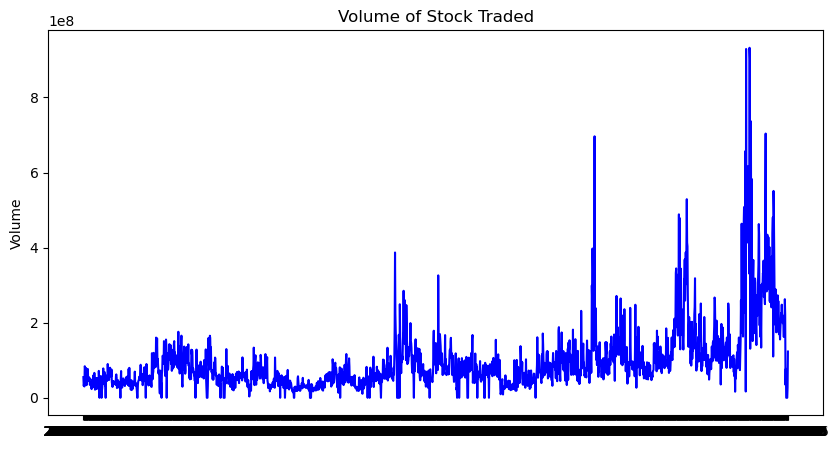

In [13]:
volume_analysis(df,'of')

# Train & Test Splitting The Data

In [14]:
train, test = train_test_split(df, test_size = 0.2)

In [15]:
test_pred = test.copy()

In [16]:
train.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
1562,2021-03-01,2.592052,2.646053,2.574052,2.646053,2.477697,118405273.0
1806,2022-02-21,3.892579,3.915079,3.807077,3.847578,3.712741,108701821.0
1370,2020-05-28,2.209544,2.254545,2.200544,2.223045,2.081603,119344821.0
1348,2020-04-21,2.214044,2.223045,2.178044,2.182544,2.043679,66169500.0
1071,2019-03-27,2.569552,2.610052,2.335547,2.344547,2.195374,149055948.0
596,2017-05-31,3.132063,3.172564,3.127563,3.154564,2.831174,74169556.0
762,2018-01-18,3.213065,3.267066,3.177064,3.226565,2.895794,87713043.0
416,2016-09-21,2.178044,2.200544,2.169044,2.196044,1.893973,48233360.0
866,2018-06-13,2.578552,2.623553,2.569552,2.578552,2.414490,48250204.0
111,2015-07-22,2.430049,2.452549,2.421049,2.439049,2.027065,31890688.0


In [17]:
test.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
1580,2021-03-25,2.232045,2.254545,2.178044,2.196044,2.056320,94759655.0
555,2017-04-04,2.893558,2.911559,2.866558,2.875558,2.580771,48935281.0
1081,2019-04-10,2.655053,2.659554,2.596552,2.605552,2.439773,42396603.0
518,2017-02-10,2.862058,2.889058,2.767556,2.767556,2.386873,104244572.0
1990,2022-11-16,9.790000,10.460000,9.610000,9.920000,9.920000,703736598.0
1358,2020-05-07,2.196044,2.218545,2.187044,2.205044,2.064747,59169749.0
966,2018-10-31,1.818036,1.854037,1.777536,1.795536,1.681294,88324773.0
625,2017-07-11,3.388568,3.519071,3.375068,3.496570,3.138120,52464132.0
1446,2020-09-16,2.263545,2.277046,2.250045,2.259045,2.115312,37180740.0
2043,2023-01-30,10.830000,11.120000,10.690000,10.750000,10.750000,161986819.0


In [18]:
x_train = train[['Open', 'High', 'Low', 'Volume']].values
x_test = test[['Open', 'High', 'Low', 'Volume']].values

In [19]:
y_train = train['Close'].values
y_test = test['Close'].values

# Linear Regression

In [20]:
model_lnr = LinearRegression()
model_lnr.fit(x_train, y_train)

LinearRegression()

In [21]:
y_pred = model_lnr.predict(x_test)

In [22]:
result = model_lnr.predict([[2.970060,2.997060,2.902558,55057948.0]])
print(result)

[2.93681457]


In [23]:
print("MSE",round(mean_squared_error(y_test,y_pred), 3))
print("RMSE",round(np.sqrt(mean_squared_error(y_test,y_pred)), 3))
print("MAE",round(mean_absolute_error(y_test,y_pred), 3))
print("MAPE",round(mean_absolute_percentage_error(y_test,y_pred), 3))
print("R2 Score : ", round(r2_score(y_test,y_pred), 3))

MSE 0.004
RMSE 0.065
MAE 0.027
MAPE 0.007
R2 Score :  0.999


In [24]:
viz['Date']=pd.to_datetime(viz['Date'],format='%Y-%m-%d')

In [25]:
def style():
    plt.figure(facecolor='black', figsize=(15,10))
    ax = plt.axes()
    ax.tick_params(axis='x', colors='white')    
    ax.tick_params(axis='y', colors='white')    
    ax.spines['left'].set_color('white')       
    ax.spines['bottom'].set_color('white')      
    ax.set_facecolor("black")                  

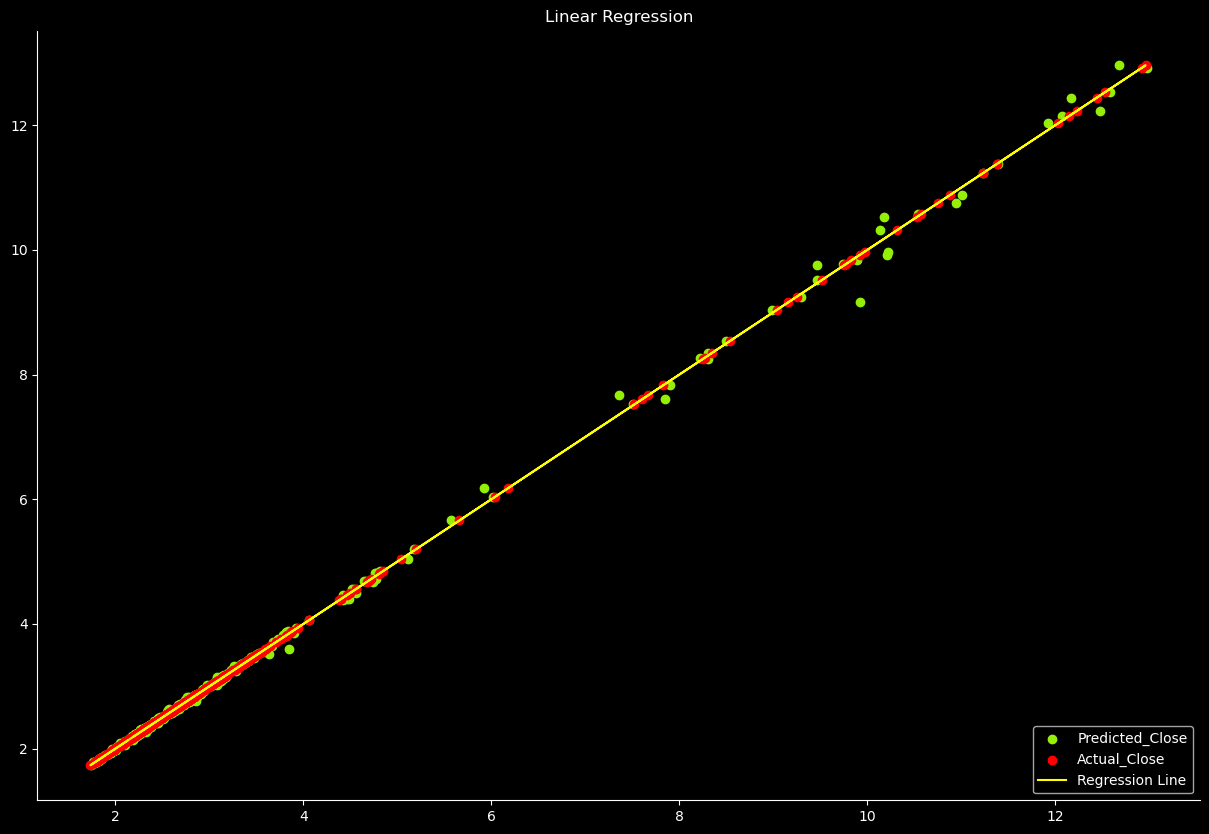

In [26]:
style()

plt.title('Linear Regression', color="white")
plt.scatter(y_pred, y_test, color="#94F008")
plt.scatter(y_test, y_test, color="red")
plt.plot(y_test, y_test, color="yellow")
plt.legend(["Predicted_Close", "Actual_Close", "Regression Line"], loc ="lower right", facecolor='black', labelcolor='white')